# Exploración de datos

## Cargue de librerias y parametros

In [23]:
%load_ext autoreload
%autoreload 2

import sys
import os

# Agrega la ruta del directorio 'src' al path

sys.path.append(os.path.abspath('../src'))

# Importar módulos personalizados:

from procesamiento_datos import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Definición de rutas:

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
datos_raw = "..//data/raw/"
datos_processed = "..//data/processed/"

## Cargue de los dataframes

## Revisión Inicial dataframes
---
### Histórico de Facturas

Este informe reúne el detalle de todas las facturas emitidas desde **enero de 2018 hasta junio de 2025**.  
La información incluye:  

- **Fecha de emisión y vencimiento** de cada factura.  
- **Estado de la factura** con corte al **30 de junio de 2025**.  
- **Valor total facturado** y **saldo pendiente de pago**.  
- En caso de existir abonos, se especifica el **valor pagado** y la **fecha del pago**.  

Gracias a este histórico podemos:  

- Identificar **hábitos de pago** de cada cliente.  
- Reconocer **patrones de cumplimiento** y posibles retrasos.  
- Contar con una base sólida para una **gestión financiera y de cobranza más eficiente**.  

En pocas palabras, este reporte nos ofrece una visión clara y práctica para entender cómo nuestros clientes manejan sus compromisos de pago a lo largo del tiempo.  


In [31]:
# Cargue del histórico de facturas:

df_facturas = cargar_datos(datos_raw + "Historico_Facturas.csv")

df_facturas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61393 entries, 0 to 61392
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NIT                61393 non-null  object 
 1   id_factura         61393 non-null  int64  
 2   Fecha_expedicion   61393 non-null  object 
 3   Estado             61393 non-null  object 
 4   Total factura      61393 non-null  float64
 5   Saldo              61393 non-null  float64
 6   Fecha_pago         60546 non-null  object 
 7   Fecha_vencimiento  61393 non-null  object 
 8   Valor_pagado       61393 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 4.2+ MB


In [32]:
convertir_fecha(df_facturas,['Fecha_expedicion','Fecha_pago','Fecha_vencimiento'])
df_facturas


,NIT,id_factura,Fecha_expedicion,Estado,Total factura,Saldo,Fecha_pago,Fecha_vencimiento,Valor_pagado
0,42ecd8cb62d29625ad81914f17a48c219acb5d2be2daf0...,186537,2025-06-18,CONFIRMADA,1035398.0,1035398.0,NaT,2025-07-18,0.0
1,46f7f7e4cdea7bc958d0999864222c63474cbd4f9751be...,177214,2024-08-28,PAGADA,773500.0,0.0,2024-09-25,2024-09-27,773500.0
2,727d72342d46d4357539ec474dae79ce388234624a74d7...,161840,2022-11-25,PAGADA,11900000.0,0.0,2024-11-28,2022-12-25,11900000.0
3,c1d637e1f5632d028983dbc5a46b8ea1dcae5a7aee1331...,161841,2022-11-25,PAGADA,11900000.0,0.0,2024-08-07,2022-12-25,11900000.0
4,bec0e3be4b4d494a8b98d121499d2ff4d8bae3cdb5526b...,177216,2024-08-28,PAGADA,773500.0,0.0,2025-01-10,2024-09-27,773500.0
...,...,...,...,...,...,...,...,...,...
61388,97b08d62d4b078cad69cc9a52a325ddf8b88078a21ef0d...,181279,2025-02-13,PAGADA,41562106.0,0.0,2025-06-09,2025-03-15,41562106.0
61389,97b08d62d4b078cad69cc9a52a325ddf8b88078a21ef0d...,184044,2025-03-06,PAGADA,43257302.0,0.0,2025-03-20,2025-04-05,43257302.0
61390,97b08d62d4b078cad69cc9a52a325ddf8b88078a21ef0d...,185064,2025-04-14,PAGADA,45900437.0,0.0,2025-04-16,2025-05-14,45900437.0
61391,97b08d62d4b078cad69cc9a52a325ddf8b88078a21ef0d...,185619,2025-05-09,PAGADA,45269411.0,0.0,2025-06-23,2025-06-08,45269411.0


In [33]:
revision_inicial(df_facturas)

Cantidad de observaciones: 61393
Primeras filas del DataFrame:
                                                 NIT  id_factura  \
0  42ecd8cb62d29625ad81914f17a48c219acb5d2be2daf0...      186537   
1  46f7f7e4cdea7bc958d0999864222c63474cbd4f9751be...      177214   
2  727d72342d46d4357539ec474dae79ce388234624a74d7...      161840   
3  c1d637e1f5632d028983dbc5a46b8ea1dcae5a7aee1331...      161841   
4  bec0e3be4b4d494a8b98d121499d2ff4d8bae3cdb5526b...      177216   

  Fecha_expedicion      Estado  Total factura      Saldo Fecha_pago  \
0       2025-06-18  CONFIRMADA      1035398.0  1035398.0        NaT   
1       2024-08-28      PAGADA       773500.0        0.0 2024-09-25   
2       2022-11-25      PAGADA     11900000.0        0.0 2024-11-28   
3       2022-11-25      PAGADA     11900000.0        0.0 2024-08-07   
4       2024-08-28      PAGADA       773500.0        0.0 2025-01-10   

  Fecha_vencimiento  Valor_pagado  
0        2025-07-18           0.0  
1        2024-09-27      7735

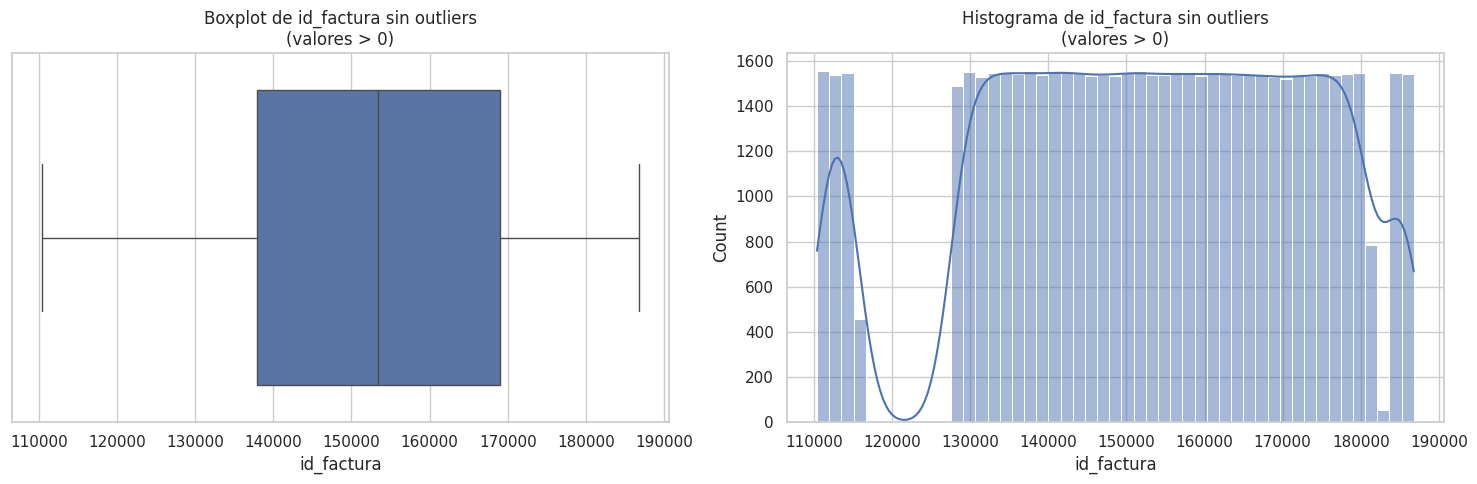

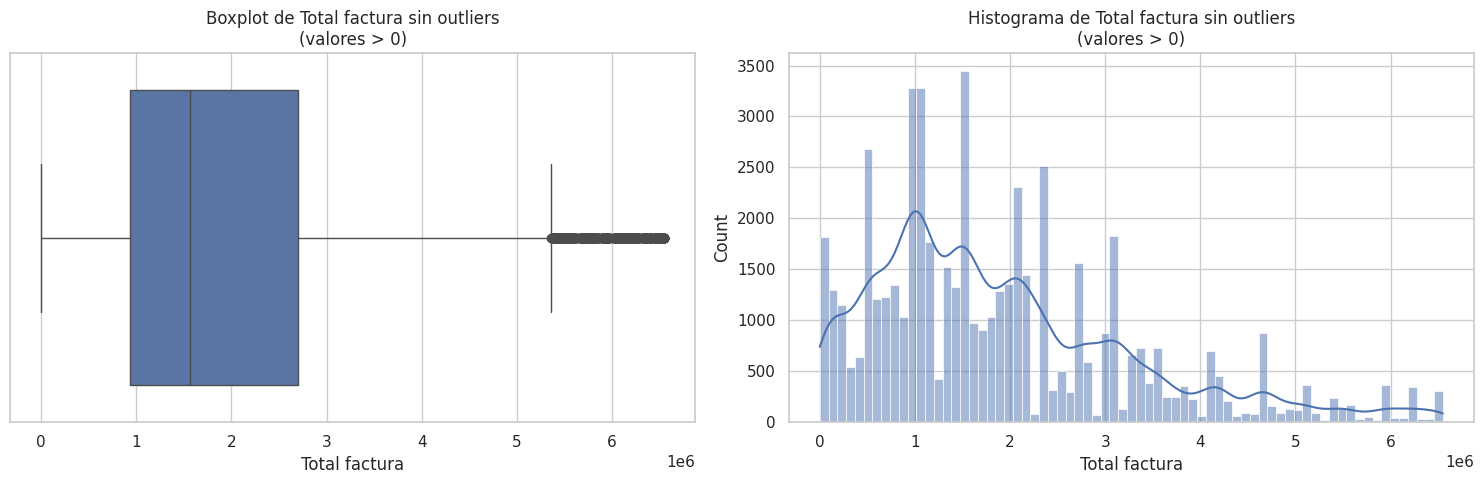

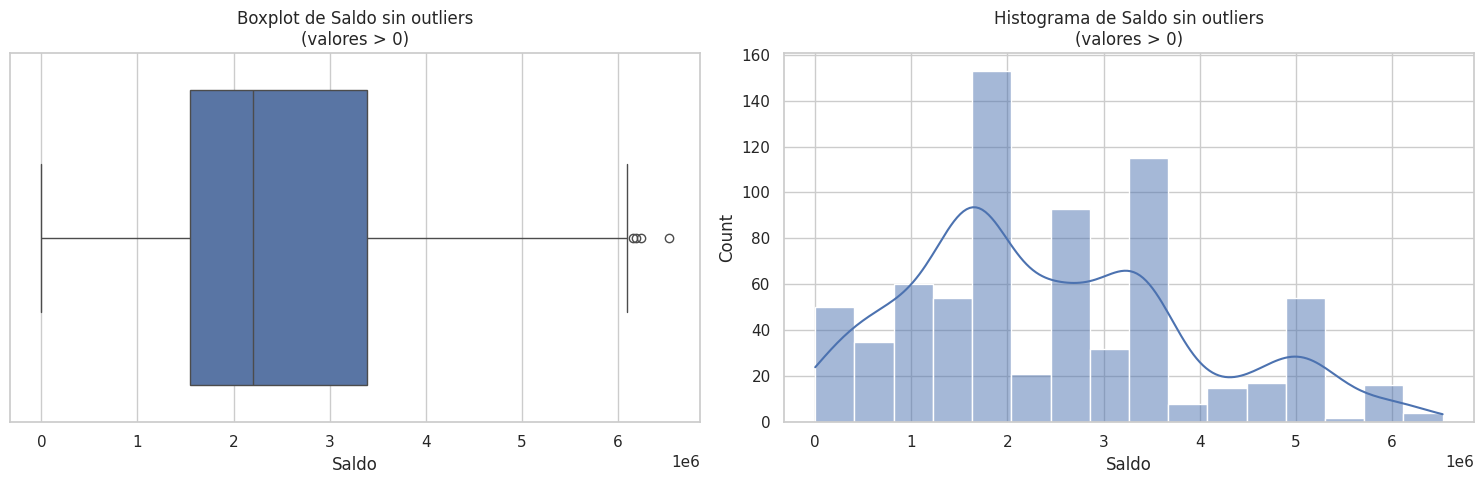

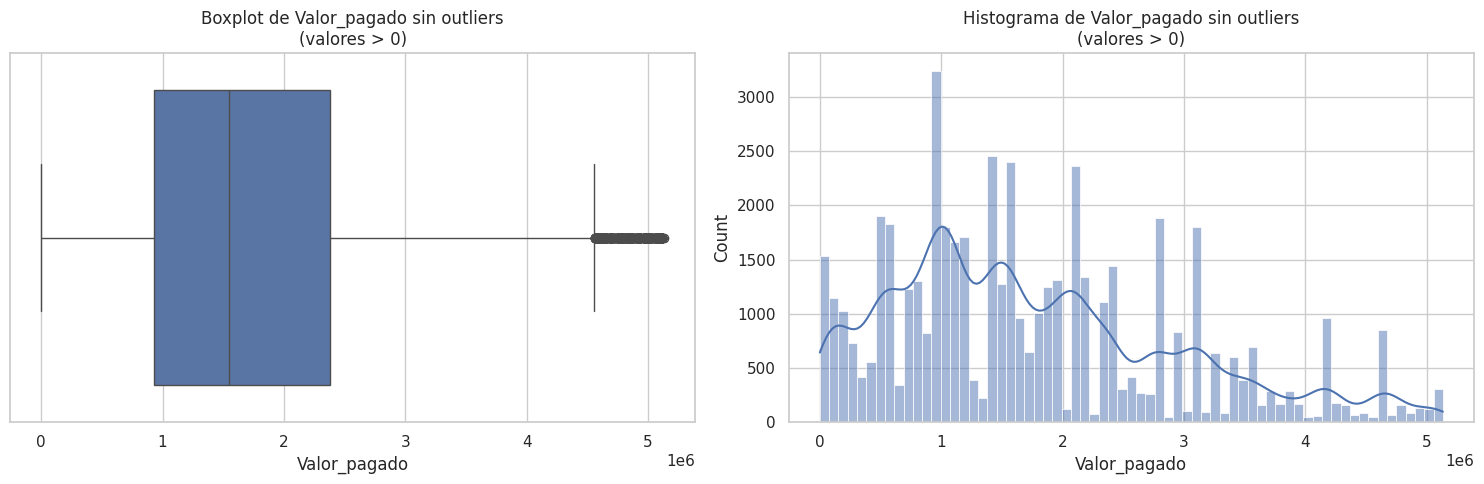

In [34]:
visualizar_distribucion(df_facturas, outliers=False)

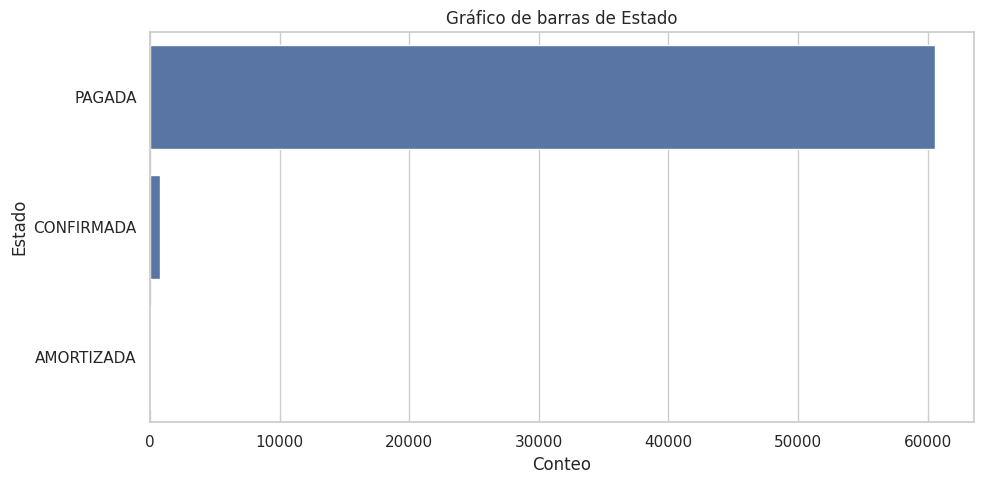

In [35]:
visualizar_categoricas(df_facturas, ['Estado'])

### Histórico de Cierres Mensuales de Facturación  

Este registro consolida los **cierres mensuales de facturación**, ofreciendo una visión detallada del estado de la cartera para cada cliente y negocio.  

El dataframe incluye información clave como:  
- **Días de mora acumulados** al cierre de cada periodo.  
- **Monto de la cuenta por cobrar**.  
- **Valor de deterioro** asociado.  
- **Calificación crediticia** asignada a cada cliente.  

Gracias a estos datos es posible:  
- Analizar el **comportamiento de pago** de los clientes.  
- Identificar **tendencias de riesgo** en la cartera.  
- Realizar un **seguimiento a la evolución histórica** de las cuentas por cobrar.  
- Apoyar la **toma de decisiones estratégicas** en gestión crediticia y análisis financiero.  

En resumen, este histórico se convierte en una herramienta clave para anticipar riesgos, optimizar la gestión de cartera y fortalecer la sostenibilidad financiera del negocio.  


In [26]:
df_cierres = cargar_datos(datos_raw+'Historico_Cierres.csv')

df_cierres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13117 entries, 0 to 13116
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NIT                   13080 non-null  object 
 1   Mes informe           13117 non-null  int64  
 2   Cliente               13117 non-null  object 
 3   Fecha de Vencimiento  13117 non-null  object 
 4   Dias de Mora          13117 non-null  int64  
 5   Calificación          13117 non-null  object 
 6   Cuenta Por Cobrar     13117 non-null  float64
 7   % de Deterioro        13117 non-null  float64
 8   Valor de Deterioro    13117 non-null  float64
 9   FID                   13117 non-null  object 
 10  Fideicomiso           13117 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 1.1+ MB


In [27]:
convertir_fecha(df_cierres,['Fecha de Vencimiento'])
df_cierres


,NIT,Mes informe,Cliente,Fecha de Vencimiento,Dias de Mora,Calificación,Cuenta Por Cobrar,% de Deterioro,Valor de Deterioro,FID,Fideicomiso
0,bda703a41ee55dcb911f17164009bc87636552bd5a641b...,202301,2fd44f99ebb5f4779baa8f8c3c18b8aa3778395b58c9bf...,2022-09-15,0,A,2380000.00,0.0022,5236.00,b527ab75d12cba5a48db8e39b6dc776fafe8d0a64454c1...,ef41b40f72aabddd7491277f62e2d14d7f8126b6c06831...
1,a6f8bc5c429a36aba24d818a811da81ef5f66107c131f4...,202301,ddbb7aaaf540b1d826fe0a1b86d885bce851a6a10b17c1...,2023-02-28,0,A,0.00,0.0022,0.00,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,c7b36740e4a4084fabf1f8fe801822e3c638dcc964917a...
2,f810167a3f88559f1cf90ac412c7d70c0de7f54742bcad...,202301,e7f467d21e1ae519b47b15c10f7de9368ada74e51d0e90...,2023-02-28,0,A,0.00,0.0022,0.00,eaab7f29f0ebeeb28a5fcae7dba2f7b07bf2fa942bab4b...,f1cb9ef1cdaf60372aaecc67cf18b3e0faaec12172234f...
3,c8ad84d88132c613b3343688e13ada573e8976d18b58ec...,202301,e9485dbb84aae5eb13fc27277fe3632c880ce13cf5c847...,2023-02-28,0,A,0.00,0.0022,0.00,aa6df8861c8ad85418960d463c1bfff2ec9d257d58e5ab...,1fc58270cf6d565f7721f33a604319fd0fed003c975329...
4,22a66f087c21865bab019d89cc8a7f328d7020e9bcd717...,202301,30976b83fed3f372533fa798d28600e70c3afc2db43d26...,2023-02-28,0,A,0.00,0.0022,0.00,22a725be4cbf11a95514f3c8e93885502034dfc44b52a2...,dfbe8cbeeca35fc3e79319d0ce9094df25966e94cef76b...
...,...,...,...,...,...,...,...,...,...,...,...
13112,93c7e29096be6b295b082af5134f6d6ccb70a4f5bd8186...,202506,17650896ef43b169e901acaa62cb855cac7321374b0cb6...,2023-12-17,561,E,36421600.00,1.0000,36421600.00,79c34e61bb9da63b9bb88d87c02a531d8af9ed16d85c22...,9086a8cb49a638fd91aa65fcecbf4b0191676af688006d...
13113,56b6928bdc3879ed19779d840c562e5406d9b29d2cca32...,202506,e8487cee0f1f1eb12194f76c3c112df3fb464107e18176...,2024-03-21,466,E,49906220.00,1.0000,49906220.00,136a27f6f0fd70909720b12ee3519e5aaedfbbfbbce1da...,bef3355fad40e53dfa569c024c4726cccf0aad57117677...
13114,f495b5a0005d360b2a2c3e358b2d7973c0b3e7a76e371d...,202506,0ba0a24918ff17545c50367b9ec234ddb4750355bf309f...,2022-11-11,962,E,13042400.00,1.0000,13042400.00,8005c981fac40b3ab78dc2d9271bed69f4f8b9d1e18686...,bc2b41be291e29ad0365793979794a9298b5c23ce642f5...
13115,fbbabd04e6dd67e5db8b9bb554145338c77d7415d5f620...,202506,5649133df6d8b3b7de7cf57c7c4a3b14df6ef95b05dd36...,2020-11-14,1689,E,2383943.36,1.0000,2383943.36,9ac073a07be208df6fa2ee0e4ce2a1e66c3e7156772228...,85e0c73f18242dc15a1886644a3cd2a953209312e2ecfb...


In [28]:
revision_inicial(df_cierres)

Cantidad de observaciones: 13117
Primeras filas del DataFrame:
                                                 NIT  Mes informe  \
0  bda703a41ee55dcb911f17164009bc87636552bd5a641b...       202301   
1  a6f8bc5c429a36aba24d818a811da81ef5f66107c131f4...       202301   
2  f810167a3f88559f1cf90ac412c7d70c0de7f54742bcad...       202301   
3  c8ad84d88132c613b3343688e13ada573e8976d18b58ec...       202301   
4  22a66f087c21865bab019d89cc8a7f328d7020e9bcd717...       202301   

                                             Cliente Fecha de Vencimiento  \
0  2fd44f99ebb5f4779baa8f8c3c18b8aa3778395b58c9bf...           2022-09-15   
1  ddbb7aaaf540b1d826fe0a1b86d885bce851a6a10b17c1...           2023-02-28   
2  e7f467d21e1ae519b47b15c10f7de9368ada74e51d0e90...           2023-02-28   
3  e9485dbb84aae5eb13fc27277fe3632c880ce13cf5c847...           2023-02-28   
4  30976b83fed3f372533fa798d28600e70c3afc2db43d26...           2023-02-28   

   Dias de Mora Calificación  Cuenta Por Cobrar  % de Deter

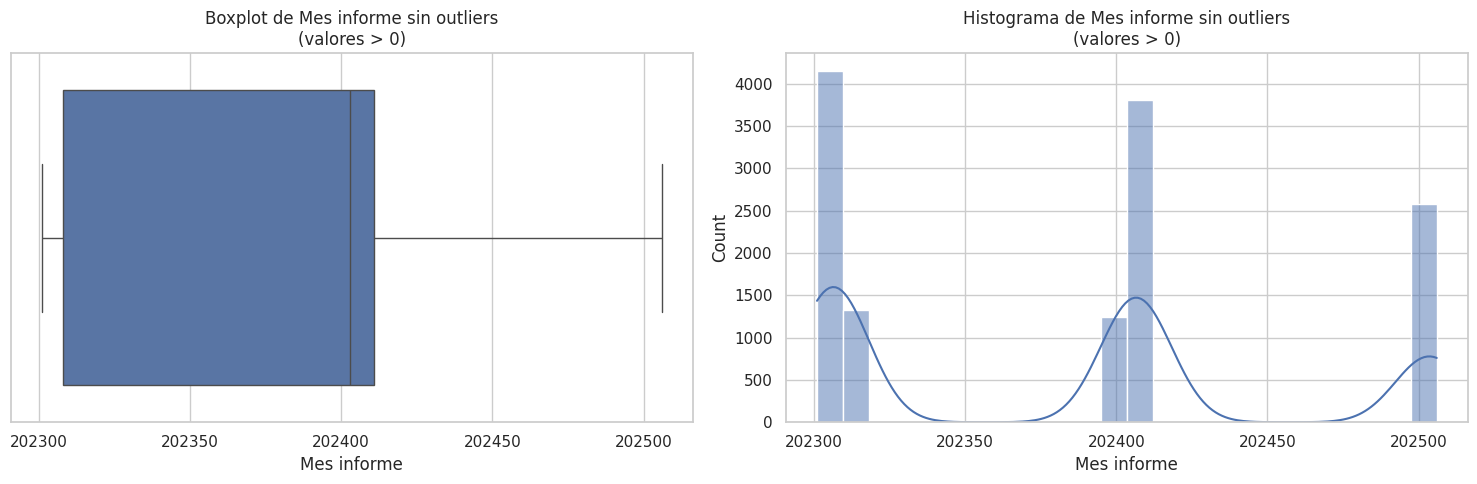

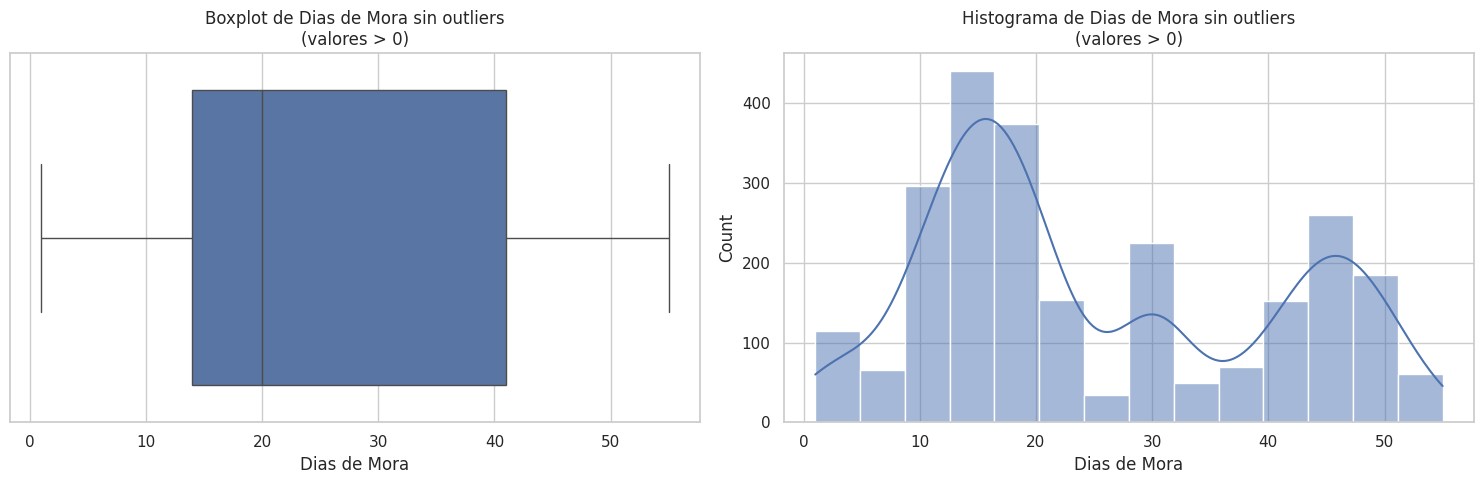

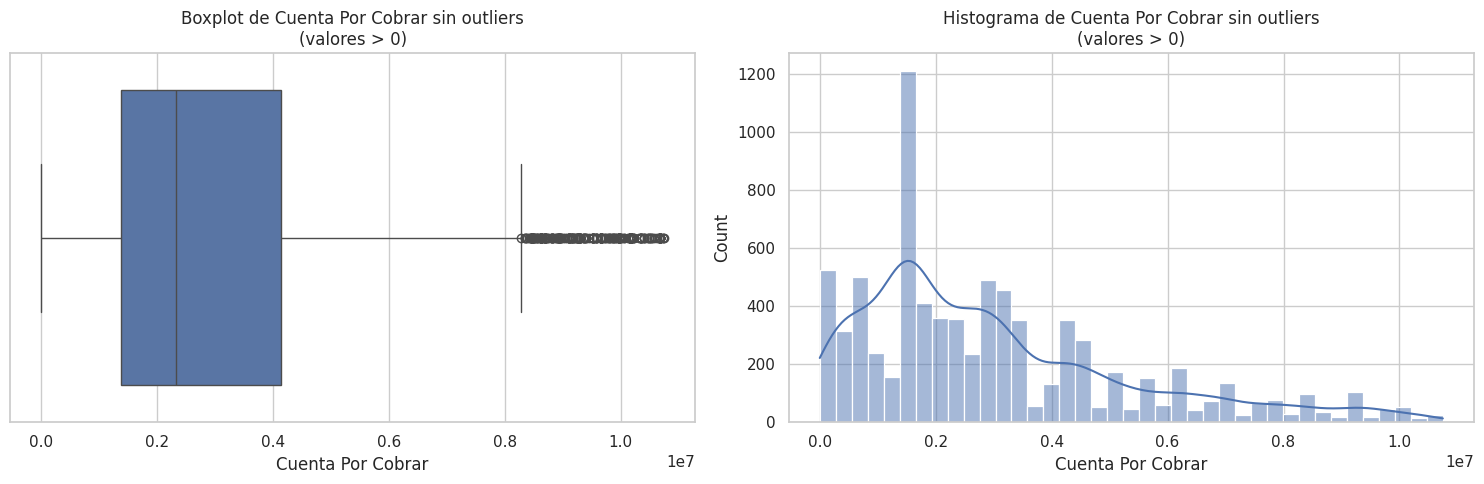

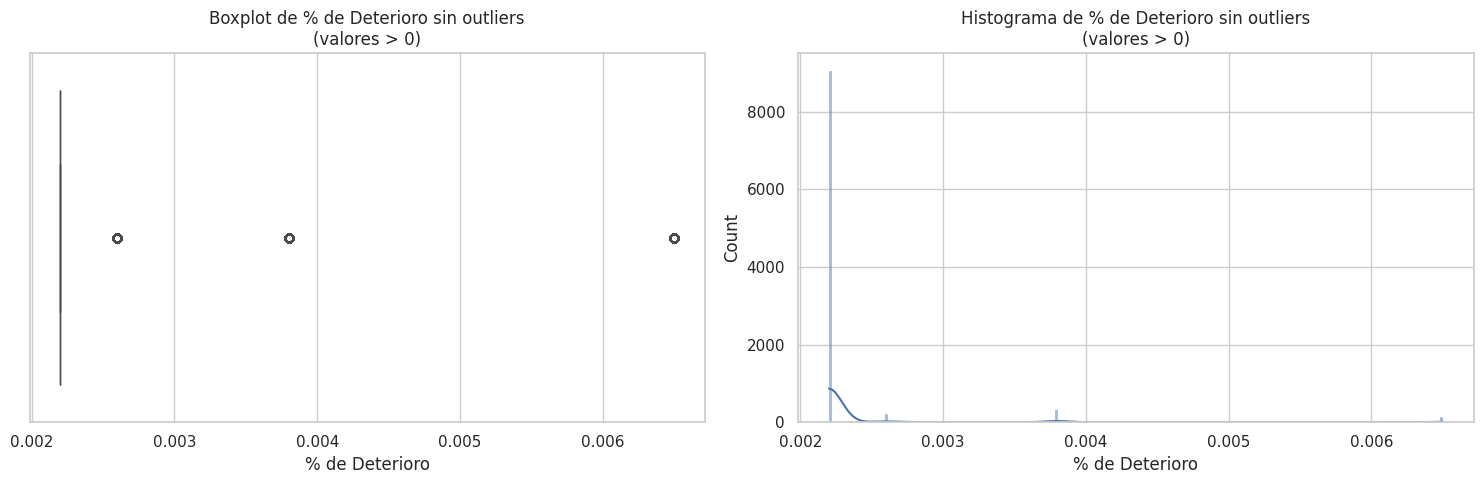

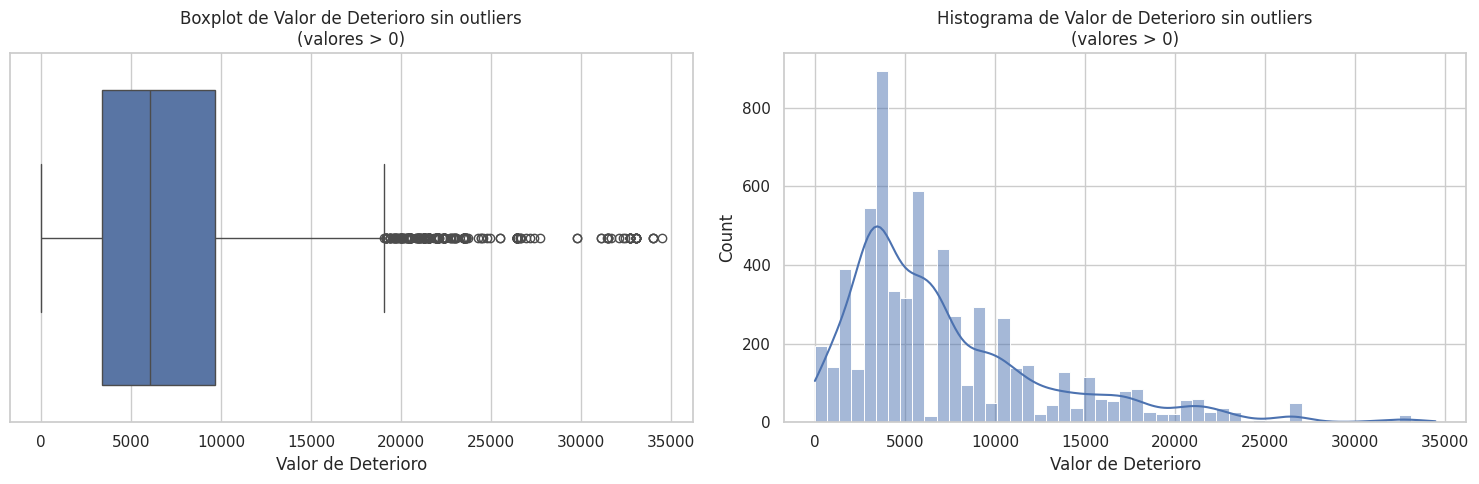

In [29]:
visualizar_distribucion(df_cierres, outliers=False)

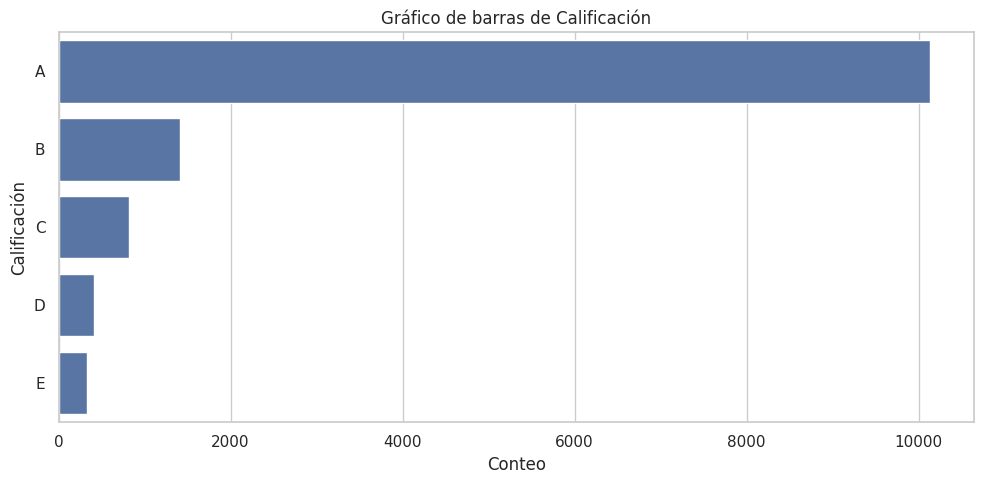

In [30]:
visualizar_categoricas(df_cierres,['Calificación'])